# Assignment: 

  - Perform initial preprocessing of data
  - Perform preprocessing for statsmodels
  - Run the model in statsmodels and produce a results summary
  - Evaluate the model on the test set

Dataset Link:  https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

# Data Dictionary

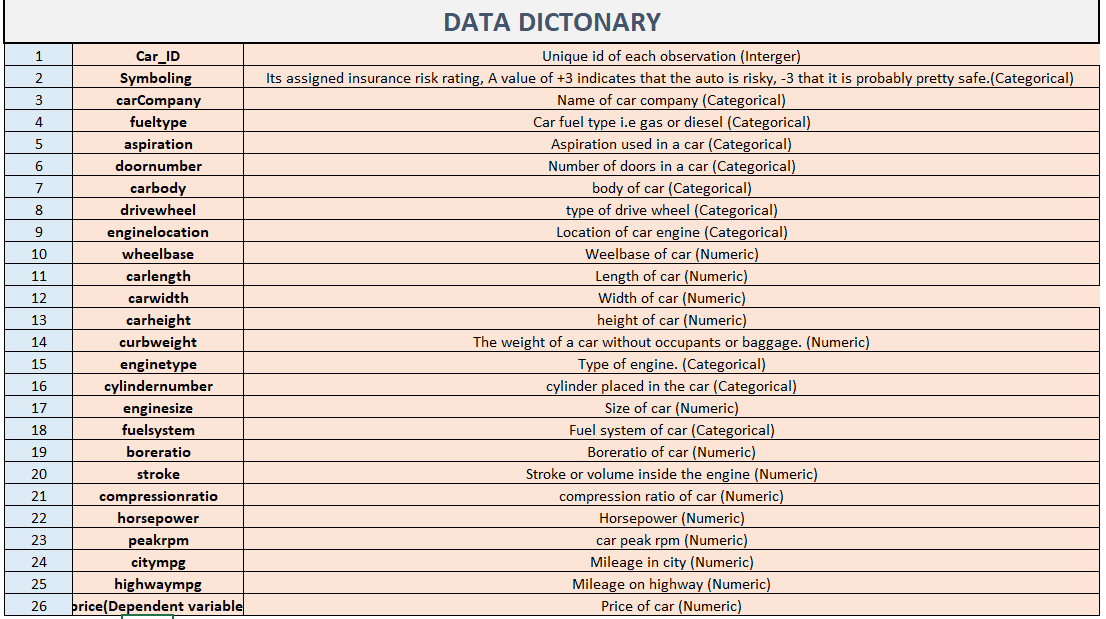

## Import Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
## fixing random for lesson generation
np.random.seed(321)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

## Load Data

In [8]:
## load data
df = pd.read_csv('Data/CarPrice.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Preprocessing

In [9]:
## checking for null values
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

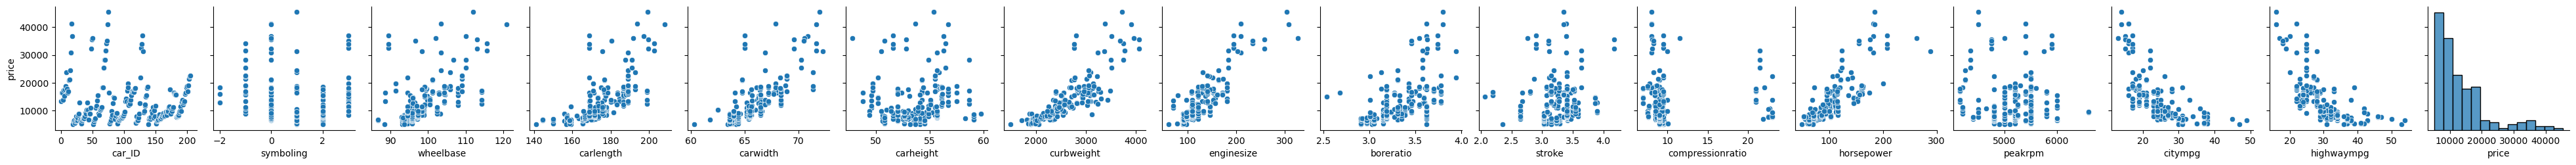

In [10]:
## Quick EDA for cols related to target
sns.pairplot(df,y_vars='price');

In [23]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [22]:
df['compressionratio'].value_counts()

9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
8.00      8
9.20      8
7.00      7
8.60      5
21.00     5
8.40      5
7.50      5
23.00     5
9.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
9.10      1
9.31      1
7.80      1
9.41      1
21.90     1
22.00     1
22.70     1
10.10     1
11.50     1
Name: compressionratio, dtype: int64

In [20]:
## Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price']).copy()
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20
39,40,0,honda prelude,gas,std,four,sedan,fwd,front,96.5,...,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33
40,41,0,honda accord,gas,std,four,sedan,fwd,front,96.5,...,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19
123,124,-1,plymouth valiant,gas,std,four,wagon,fwd,front,103.3,...,four,122,2bbl,3.35,3.46,8.5,88,5000,24,30


In [24]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [25]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [29]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())
preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols), remainder='passthrough')

## Preparing the Data for OLS Model

In [30]:
## fit the col transformer
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['car_ID', 'symboling', 'wheelbase',
                                  'carlength', 'carwidth', 'carheight',
                                  'curbweight', 'enginesize', 'boreratio',
                                  'stroke', 'compressionratio', 'horsepower',
                                  'peakrpm', 'citympg', 'highwaympg'])])

In [31]:
pd.DataFrame(preprocessor.transform(X_train).round(3))

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.078,1.856,1.946,1.104,0.376,-0.546,2.025,0.558,-1.533,-1.518
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.192,-0.489,-0.390,-0.678,0.992,-0.308,-0.461,1.363,0.259,0.318
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.192,-0.357,-0.390,-0.678,0.992,-0.308,-0.461,1.363,0.259,0.318
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.331,2.951,3.102,1.142,2.906,-0.523,1.870,-0.752,-1.533,-1.659
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.487,-0.038,-0.107,0.081,0.603,-0.427,-0.410,-0.248,-0.189,-0.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.756,0.776,0.341,1.711,-0.402,-0.190,0.264,0.558,-0.339,-0.388
149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.192,-0.175,-0.390,-0.678,0.992,-0.308,-0.073,1.363,-0.189,-0.388
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.136,-1.436,-0.815,-1.588,0.441,-0.261,-0.721,1.766,0.856,1.025
151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.378,0.514,0.695,0.990,1.901,-0.784,1.067,-0.248,-0.936,-0.953


In [32]:
## Create the empty list
final_features = []

In [33]:
## Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-1']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [34]:
## A) Using named steps dictionary to find the encoder - Part 1
preprocessor.named_transformers_['pipeline-1'].named_steps

{'simpleimputer': SimpleImputer(fill_value='MISSING', strategy='constant'),
 'onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False)}

In [35]:
## A) Using named steps dictionary to find the encoder - Part 2
ohe_step = preprocessor.named_transformers_['pipeline-1'].named_steps['onehotencoder']

In [36]:
## Now, get OHE feature names
cat_features = ohe_step.get_feature_names_out(cat_cols)
cat_features

array(['CarName_alfa-romero giulia', 'CarName_alfa-romero stelvio',
       'CarName_audi 100 ls', 'CarName_audi 100ls', 'CarName_audi 5000',
       'CarName_audi 5000s (diesel)', 'CarName_audi fox',
       'CarName_bmw 320i', 'CarName_bmw x1', 'CarName_bmw x3',
       'CarName_bmw x5', 'CarName_bmw z4', 'CarName_buick century',
       'CarName_buick century luxus (sw)',
       'CarName_buick century special', 'CarName_buick opel isuzu deluxe',
       'CarName_buick regal sport coupe (turbo)', 'CarName_buick skylark',
       'CarName_chevrolet impala', 'CarName_chevrolet monte carlo',
       'CarName_chevrolet vega 2300', 'CarName_dodge challenger se',
       'CarName_dodge colt (sw)', 'CarName_dodge coronet custom',
       'CarName_dodge coronet custom (sw)', 'CarName_dodge d200',
       'CarName_dodge rampage', 'CarName_honda accord',
       'CarName_honda accord cvcc', 'CarName_honda civic',
       'CarName_honda civic (auto)', 'CarName_honda civic 1300',
       'CarName_honda civic 

In [37]:
## Add the categorical feature names to our final_features list
final_features.extend(cat_features)
final_features

['CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 5000',
 'CarName_audi 5000s (diesel)',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw x5',
 'CarName_bmw z4',
 'CarName_buick century',
 'CarName_buick century luxus (sw)',
 'CarName_buick century special',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skylark',
 'CarName_chevrolet impala',
 'CarName_chevrolet monte carlo',
 'CarName_chevrolet vega 2300',
 'CarName_dodge challenger se',
 'CarName_dodge colt (sw)',
 'CarName_dodge coronet custom',
 'CarName_dodge coronet custom (sw)',
 'CarName_dodge d200',
 'CarName_dodge rampage',
 'CarName_honda accord',
 'CarName_honda accord cvcc',
 'CarName_honda civic',
 'CarName_honda civic (auto)',
 'CarName_honda civic 1300',
 'CarName_honda civic 1500 gl',
 'CarName_honda civic cvcc',
 'CarName_honda prelude',
 'CarName_isuz

In [38]:
num_cols

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [39]:
## adding the numeric features which were passed through the model
final_features.extend(num_cols)
final_features

['CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 5000',
 'CarName_audi 5000s (diesel)',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw x5',
 'CarName_bmw z4',
 'CarName_buick century',
 'CarName_buick century luxus (sw)',
 'CarName_buick century special',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skylark',
 'CarName_chevrolet impala',
 'CarName_chevrolet monte carlo',
 'CarName_chevrolet vega 2300',
 'CarName_dodge challenger se',
 'CarName_dodge colt (sw)',
 'CarName_dodge coronet custom',
 'CarName_dodge coronet custom (sw)',
 'CarName_dodge d200',
 'CarName_dodge rampage',
 'CarName_honda accord',
 'CarName_honda accord cvcc',
 'CarName_honda civic',
 'CarName_honda civic (auto)',
 'CarName_honda civic 1300',
 'CarName_honda civic 1500 gl',
 'CarName_honda civic cvcc',
 'CarName_honda prelude',
 'CarName_isuz

## Transforming X_train and X_test and remaking DataFrames

In [40]:
X_train_df = pd.DataFrame( preprocessor.transform(X_train), columns=final_features, index=X_train.index)
X_train_df.head()

,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.078184,1.855775,1.945552,1.104185,0.376132,-0.546313,2.025098,0.557617,-1.532551,-1.517697
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.192373,-0.489363,-0.390498,-0.677725,0.992489,-0.308461,-0.461496,1.363430,0.258514,0.318495
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.192373,-0.356583,-0.390498,-0.677725,0.992489,-0.308461,-0.461496,1.363430,0.258514,0.318495
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.331061,2.951215,3.101778,1.142097,2.906440,-0.522527,1.869686,-0.751829,-1.532551,-1.658942
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.487430,-0.038300,-0.107341,0.080534,0.603211,-0.427387,-0.409692,-0.248196,-0.189252,-0.105242


In [41]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=final_features, index=X_test.index)
X_test_df.head()

,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.331061,2.951215,3.101778,1.142097,2.906440,-0.522527,1.869686,-0.751829,-1.532551,-1.658942
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.037920,0.742762,0.340992,1.710792,-0.402424,-0.189535,0.263760,0.557617,-0.189252,-0.387733
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.514486,-0.262855,-0.437691,1.104185,-2.056855,-0.308461,-0.565104,-0.651102,-0.338507,-0.246487
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.192373,-1.190367,-0.838831,-1.132681,-0.402424,-0.308461,-0.927733,-0.248196,0.855536,1.024722
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.433958,-0.450310,-0.154534,0.004708,0.635651,-0.427387,-0.176574,0.154711,0.258514,0.459740


In [43]:
## Demo of adding a constant to X_train (not rewriting the df yet-confirming expected results first)
sm.add_constant(X_train_df, prepend=False, has_constant='add').head()

,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.855775,1.945552,1.104185,0.376132,-0.546313,2.025098,0.557617,-1.532551,-1.517697,1.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.489363,-0.390498,-0.677725,0.992489,-0.308461,-0.461496,1.363430,0.258514,0.318495,1.0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.356583,-0.390498,-0.677725,0.992489,-0.308461,-0.461496,1.363430,0.258514,0.318495,1.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.951215,3.101778,1.142097,2.906440,-0.522527,1.869686,-0.751829,-1.532551,-1.658942,1.0
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.038300,-0.107341,0.080534,0.603211,-0.427387,-0.409692,-0.248196,-0.189252,-0.105242,1.0


In [44]:
## Overwrite 
X_train_df = sm.add_constant(X_train_df,has_constant='add', prepend=False)
X_test_df = sm.add_constant(X_test_df,has_constant='add', prepend=False)
display(X_train_df.head(2), X_test_df.head(2))

,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.855775,1.945552,1.104185,0.376132,-0.546313,2.025098,0.557617,-1.532551,-1.517697,1.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.489363,-0.390498,-0.677725,0.992489,-0.308461,-0.461496,1.363430,0.258514,0.318495,1.0


,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.951215,3.101778,1.142097,2.906440,-0.522527,1.869686,-0.751829,-1.532551,-1.658942,1.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.742762,0.340992,1.710792,-0.402424,-0.189535,0.263760,0.557617,-0.189252,-0.387733,1.0


## Fitting OLS in Statsmodels

In [45]:
## instantiate an OLS model WITH the training data.
# hasconst=True is the default, but showing for demo
model = sm.OLS(y_train, X_train_df, hasconst=True)

In [46]:
# Fitting the model (no data in .fit) and saving the result as new var
result = model.fit()

## Evaluate

In [47]:
## get model performance metrics
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     65.75
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           3.04e-06
Time:                        11:02:05   Log-Likelihood:                -1033.6
No. Observations:                 153   AIC:                             2359.
Df Residuals:                       7   BIC:                             2802.
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
CarName_alfa-romero giulia               2624.6105   8791.359      0.299      0.774   -1.82e+04    2.34e+04
CarName_alfa-romero stelvio              5602.9150   8681.425      0.645      0.539   -1.49e+04    2.61e+04
CarName_audi 100 ls                      4935.0408    1.2e+04      0.413      0.692   -2.33e+04    3.32e+04
CarName_audi 100ls                      -4899.0854   8124.540     -0.603      0.566   -2.41e+04    1.43e+04
CarName_audi 5000                        1853.2394   5826.819      0.318      0.760   -1.19e+04    1.56e+04
CarName_audi 5000s (diesel)             -3971.7227   6803.341     -0.584      0.578   -2.01e+04    1.21e+04
CarName_audi fox                         1950.4632   5491.551      0.355      0.733    -1.1e+04    1.49e+04
CarName_bmw 320i                         8518.6392   1.02e+04      0.832      0.433   -1.57e+04    3.27e+04
CarName_bmw x1                           2.387e+04   1.13e+04      2.121      0.072   -2745.642    5.05e+04
CarName_bmw x3                           2.107e+04   1.12e+04      1.878      0.102   -5459.151    4.76e+04
CarName_bmw x5                            3.17e+04   1.08e+04      2.940      0.022    6204.912    5.72e+04
CarName_bmw z4                           2.023e+04   1.16e+04      1.742      0.125   -7225.887    4.77e+04
CarName_buick century                    5943.6753   4011.097      1.482      0.182   -3541.063    1.54e+04
CarName_buick century luxus (sw)         7347.6454   5112.602      1.437      0.194   -4741.737    1.94e+04
CarName_buick century special           -1002.2475   5484.231     -0.183      0.860    -1.4e+04     1.2e+04
CarName_buick opel isuzu deluxe         -5385.5854   3012.403     -1.788      0.117   -1.25e+04    1737.616
CarName_buick regal sport coupe (turbo)  7828.4801   3976.604      1.969      0.090   -1574.694    1.72e+04
CarName_buick skylark                   -4248.8318   3822.369     -1.112      0.303   -1.33e+04    4789.635
CarName_chevrolet impala                 4404.0924   3201.837      1.375      0.211   -3167.050     1.2e+04
CarName_chevrolet monte carlo            1190.6484   8383.961      0.142      0.891   -1.86e+04     2.1e+04
CarName_chevrolet vega 2300              -349.5750   8487.983     -0.041      0.968   -2.04e+04    1.97e+04
CarName_dodge challenger se              -644.9803   8500.716     -0.076      0.942   -2.07e+04    1.95e+04
CarName_dodge colt (sw)                 -3596.6061   8324.796     -0.432      0.679   -2.33e+04    1.61e+04
CarName_dodge coronet custom            -3534.6782   9085.386     -0.389      0.709    -2.5e+04    1.79e+04
CarName_dodge coronet custom (sw)       -2235.7083   4059.806     -0.551      0.599   -1.18e+04    7364.208
CarName_dodge d200                      -3045.1037   9367.6

## Evaluate on Test Set

In [48]:
# after fitting statsmodels, use the result variable with .predict()
test_preds = result.predict(X_test_df)

In [49]:
test_r2 = r2_score(y_test, test_preds)
test_mse = mean_squared_error(y_test, test_preds)

In [50]:
print(f'The testing r-square value is {test_r2} and the testing mean squared error is {test_mse}.')

The testing r-square value is -0.1459331642934616 and the testing mean squared error is 87664932.73288602.
